# Report from neural network task

In [1]:
from experiment import experiment, evaluate_best_model, ModelType
from utils import plot_loss
from preprocessing import MnistDataloader
import pandas as pd

## Data preprocessing
MNIST dataset is used for training and testing custom neural network. Images are loaded and preprocessed using a MnistDataLoader class from a kaggle notebook (https://www.kaggle.com/code/hojjatk/read-mnist-dataset). DataLoader class is slightly modified to return images and labels in `np.ndarray` format and split `train-images` and `train-labels` into train and validation sets.

In [2]:
mnist_dataloader = MnistDataloader("train-images-idx3-ubyte", "train-labels-idx1-ubyte", "t10k-images.idx3-ubyte", "t10k-labels.idx1-ubyte")
data_train, data_val, data_test = mnist_dataloader.load_data()

## Neural network and experiments
### Implementation
This custom neural network is built by stacking multiple `Layer` objects. Each Layer is responsible for handling:
- **Parameter Initialization**
Uses a controlled strategy (He) to avoid issues like exploding or vanishing gradients.
- **Forward Propagation**
Computes $Z=XW^T+b$ for inputs $X$, and applies either ReLU or Softmax activation.
- **Backward Propagation**
Calculates the gradients of the loss function with respect to the weights, biases, and inputs for that layer.
- **Parameter Updates**
Adjusts weights and biases in a gradient descent step.

The `Model` class combines these layers to form a complete neural network and provides:
- **Forward Propagation**
Sequentially passes data through all layers, calling each layer’s forward method.
- **Cross-Entropy Loss**
Quantifies the difference between predicted probabilities and the true labels.
- **Backward Propagation**
Propagates gradients backward through the layers in reverse order, calling each layer’s backward and update parameters methods.
- **Prediction**
Utilizes the trained network to infer the class labels of new inputs.
### Experiments
First, I do a broad overview of architectures with different layers count, sizes, learning rates and batch sizes to establish the right approach. Every model is trained for 50 epochs.

Out of these networks I will choose the best performing one and submit it to further hyperparameter tuning.


In [3]:
models_to_test = [[((784, 256), "relu"), ((256, 128), "relu"), ((128, 64), "relu"), ((64, 10), "softmax")],
                  [((784, 128), "relu"), ((128, 64), "relu"), ((64, 10), "softmax")],
                  [((784, 256), "relu"), ((256, 10), "softmax")],
                  [((784, 10), "softmax")]]
learning_rates_to_test = [3e-4, 3e-3, 3e-3, 3e-2]
batch_sizes = [128, 128, 64, 64]
epochs = 30

In [4]:
losses, train_accuracies, val_accuracies, exec_times  = experiment(data_train, data_val, models_to_test,  epochs, learning_rates_to_test, batch_sizes, ModelType.CUSTOM)

Starting the training
Epoch: 0, loss: 0.5662963121296858
Epoch: 10, loss: 0.06916624249726118
Epoch: 20, loss: 0.02601898696092358
Training finished
Starting the training
Epoch: 0, loss: 0.35494759359545613
Epoch: 10, loss: 0.04485146297259555
Epoch: 20, loss: 0.0010924100083495617
Training finished
Starting the training
Epoch: 0, loss: 0.31473841584381246
Epoch: 10, loss: 0.022622486507314372
Epoch: 20, loss: 0.006425548515160729
Training finished
Starting the training
Epoch: 0, loss: 0.7277835461229114
Epoch: 10, loss: 0.4004724496817402
Epoch: 20, loss: 0.38231221439224655
Training finished


In [5]:
results_custom = pd.DataFrame({"model": models_to_test, "learning_rate": learning_rates_to_test, "batch_size": batch_sizes, "train_accuracy": train_accuracies, "val_accuracy": val_accuracies, "training_time": exec_times})
results_custom

,model,learning_rate,batch_size,train_accuracy,val_accuracy,training_time
0,"[((784, 256), relu), ((256, 128), relu), ((128...",0.0003,128,0.99624,0.9742,164.17s
1,"[((784, 128), relu), ((128, 64), relu), ((64, ...",0.0030,128,0.99964,0.9775,97.55s
2,"[((784, 256), relu), ((256, 10), softmax)]",0.0030,64,0.99986,0.9788,173.46s
3,"[((784, 10), softmax)]",0.0300,64,0.83254,0.8272,34.57s


The differences between the results of the first three architectures are minimal. However model number 2 performs best 

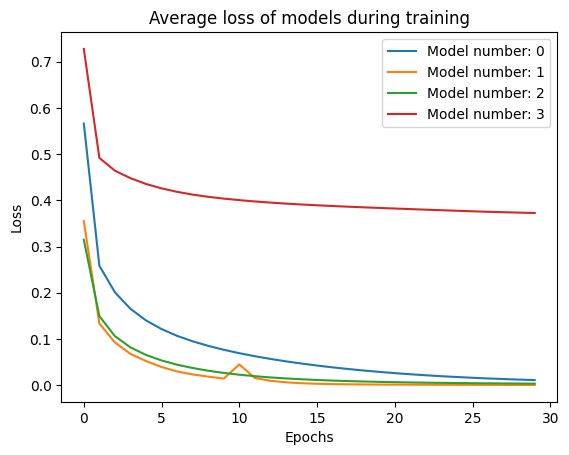

In [6]:
plot_loss(losses)

## Comparison to Pytorch neural network training
Pytorch has became the default framework for deep learning and that's why I wanted to compare performance of my custom neural network against it. All of the architectures tested above are trained using pytorch, with the same settings (initialization, optimizer, criterion) and hyperparameters as for the custom network.

In [7]:
losses, train_accuracies, val_accuracies, exec_times  = experiment(data_train, data_val, models_to_test,  epochs, learning_rates_to_test, batch_sizes, ModelType.TORCH)

Starting the training
Epoch:0, Loss: 2.330907477747144
Epoch:10, Loss: 1.3108779551732876
Epoch:20, Loss: 0.7352421788303444
Training finished
Starting the training
Epoch:0, Loss: 1.9393435222718416
Epoch:10, Loss: 0.35120266432042624
Epoch:20, Loss: 0.2776467512692789
Training finished
Starting the training
Epoch:0, Loss: 1.467449242044288
Epoch:10, Loss: 0.33511508386248673
Epoch:20, Loss: 0.2739407703866396
Training finished
Starting the training
Epoch:0, Loss: 0.7231991322773039
Epoch:10, Loss: 0.3093537015464071
Epoch:20, Loss: 0.2874980059254657
Training finished


In [8]:
results_torch = pd.DataFrame({"model": models_to_test, "learning_rate": learning_rates_to_test, "batch_size": batch_sizes, "train_accuracy": train_accuracies, "val_accuracy": val_accuracies, "training_time": exec_times})
results_torch

,model,learning_rate,batch_size,train_accuracy,val_accuracy,training_time
0,"[((784, 256), relu), ((256, 128), relu), ((128...",0.0003,128,0.85398,0.8614,37.88s
1,"[((784, 128), relu), ((128, 64), relu), ((64, ...",0.0030,128,0.92672,0.9279,27.52s
2,"[((784, 256), relu), ((256, 10), softmax)]",0.0030,64,0.92914,0.9293,44.42s
3,"[((784, 10), softmax)]",0.0300,64,0.88472,0.8878,27.22s


Surprisingly networks trained using pytorch achieved noticeably lower accuracy than those trained using custom neural network. The biggest difference occured with 0th model, which in my network had validation accuracy of 0.9742 and in pytorch one only 0.8614.

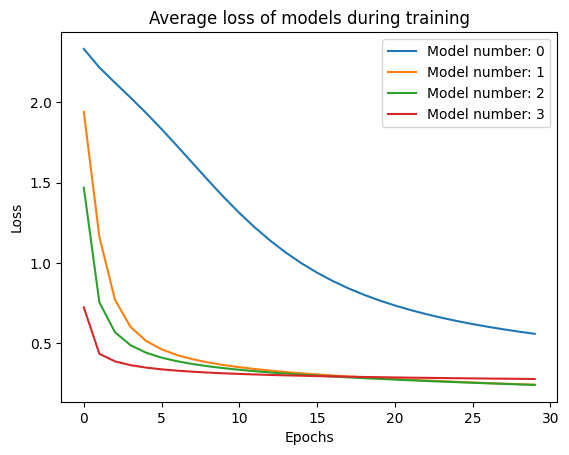

In [9]:
plot_loss(losses)

## Best architecture hyperparameter tuning

In [11]:
best_models_to_test = [models_to_test[2]]*6
learning_rates = [3e-4, 3e-4, 3e-4, 3e-3, 3e-3, 3e-3]
batch_sizes = [128, 64, 32, 128, 64, 32]
epochs = 30
losses, train_accuracies, val_accuracies, exec_times  = experiment(data_train, data_val, best_models_to_test, epochs, learning_rates, batch_sizes, ModelType.CUSTOM)

Starting the training
Epoch: 0, loss: 0.6698782396729188
Epoch: 10, loss: 0.16675871351228827
Epoch: 20, loss: 0.10649099938008576
Training finished
Starting the training
Epoch: 0, loss: 0.6978980426918832
Epoch: 10, loss: 0.16616945551794088
Epoch: 20, loss: 0.10678033824490939
Training finished
Starting the training
Epoch: 0, loss: 0.682332623586452
Epoch: 10, loss: 0.16511715124738374
Epoch: 20, loss: 0.10673106417659387
Training finished
Starting the training
Epoch: 0, loss: 0.32670978517394017
Epoch: 10, loss: 0.023428683725737042
Epoch: 20, loss: 0.006563654775218884
Training finished
Starting the training
Epoch: 0, loss: 0.313811069912411
Epoch: 10, loss: 0.023629794073696003
Epoch: 20, loss: 0.006564883495629619
Training finished
Starting the training
Epoch: 0, loss: 0.30812969507515464
Epoch: 10, loss: 0.023176609544841735
Epoch: 20, loss: 0.0063908479469236305
Training finished


In [12]:
results_best= pd.DataFrame({"model": best_models_to_test, "learning_rate": learning_rates, "batch_size": batch_sizes, "train_accuracy": train_accuracies, "val_accuracy": val_accuracies, "training_time": exec_times})
results_best

,model,learning_rate,batch_size,train_accuracy,val_accuracy,training_time
0,"[((784, 256), relu), ((256, 10), softmax)]",0.0003,128,0.97868,0.9685,109.39s
1,"[((784, 256), relu), ((256, 10), softmax)]",0.0003,64,0.97814,0.9678,170.63s
2,"[((784, 256), relu), ((256, 10), softmax)]",0.0003,32,0.97866,0.9679,304.44s
3,"[((784, 256), relu), ((256, 10), softmax)]",0.0030,128,0.99994,0.9796,105.61s
4,"[((784, 256), relu), ((256, 10), softmax)]",0.0030,64,0.99958,0.9784,184.95s
5,"[((784, 256), relu), ((256, 10), softmax)]",0.0030,32,0.99934,0.9795,308.74s


In [14]:
train_acc, val_acc, test_acc = evaluate_best_model(best_models_to_test[3], data_train, data_val, data_test, epochs, learning_rates[3], batch_sizes[3])

Starting the training
Epoch: 0, loss: 0.33198125572974846
Epoch: 10, loss: 0.02270212733185691
Epoch: 20, loss: 0.006438420115263897
Training finished


In [16]:
final_results = pd.DataFrame({"model": [best_models_to_test[4]], "learning_rate": learning_rates[4], "batch_size": batch_sizes[3], "train_accuracy": train_acc, "val_accuracy": val_acc, "test_accuracy": test_acc})
final_results

,model,learning_rate,batch_size,train_accuracy,val_accuracy,test_accuracy
0,"[((784, 256), relu), ((256, 10), softmax)]",0.003,128,0.99976,0.9791,0.9795


# Results
- The best accuracy on the validation dataset was achieved by model with architecture [((784, 256), relu), ((256, 10), softmax)].
- Custom neural networks training took significantly more time than the pytorch ones.
- Pytorch neural networks achieved worse accuracy results with every tested architecture except [((784, 10), softmax)].
- The losses of pytorch neural networks and custom neural networks varied.
# Conclusions
- Setting lower batch size significantly slows down the training (reverse is also true).
- Discrepancies between custom and pytorch network's loss are caused by the difference in CrossEntropy calculation. PyTorch implements Log-sum-exp version of CE, with raw logits expected as input of the loss, while my approach uses standard CE version with softmax function explicitly used as the activation function of the last layer.
- MNIST classification is easy enough problem to achieve extremely high testing accuracy even for very shallow neural network. Too deep of a network can even worsen the results.
- Despite the fact that no regularization techniques were used the differences between training and validation accuracies were minimal - overfitting did not occur.
